# Generate data
Generates test dataset for Volcano Plot. Uses a standard $t$ distribution to generate log2Fold change values and an exponential distribution to generate p-values. Gene names are ints taken from an interval with uniform distribution.<br>

Kernel: `volcano`<br>
**Author: Juan Sebastian Diaz Boada**<br>
*juan.sebastian.diaz.boada@ki.se*<br>
11/07/22

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Number of samples

In [2]:
N = 5000

### Gene column
Random ints that act as gene identifiers.

In [3]:
genes = np.random.randint(1000,100000,N)
genes

array([56003, 40914, 18847, ..., 36241, 64950, 29415])

### Log2Fold change
Starndard $t$ distribution

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        5.000e+00, 4.000e+00, 4.000e+00, 2.300e+01, 4.800e+01, 1.130e+02,
        3.560e+02, 1.043e+03, 1.763e+03, 1.075e+03, 3.470e+02, 1.040e+02,
        5.300e+01, 1.900e+01, 1.200e+01, 4.000e+00, 5.000e+00, 3.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-2.10935809, -2.00657871, -1.90379933, -1.80101995, -1.69824057,
        -1.59546119, -1.49268181, -1.38990243, -1.28712306, -1.18434368,
        -1.0815643 , -0.97878492, -0.87600554, -0.77322616, -0.67044678,
        -0.5676674 , -0.46488802, -0.36210864, -0.25932926, -0.15654988,
        -0.0537705 ,  0.04900888,  0.15178826,  0.25456764,  0.35734702,
         0.

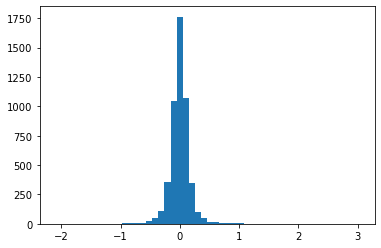

In [4]:
#log2F = 3*np.random.randn(N)
log2F = 0.1*np.random.standard_t(df=3,size=N)
log2F = log2F[np.argsort(np.abs(log2F))[::-1]]
plt.hist(log2F,bins=50)

### P-values
Truncated exponential distribution

(array([ 30.,  51.,  39.,  30.,  37.,  52.,  37.,  52.,  52.,  59.,  75.,
         82.,  72., 107., 110., 116., 115., 147., 169., 182., 227., 239.,
        238., 270., 285., 339., 352., 439., 476., 521.]),
 array([7.24387357e-04, 3.40335744e-02, 6.73427615e-02, 1.00651949e-01,
        1.33961136e-01, 1.67270323e-01, 2.00579510e-01, 2.33888697e-01,
        2.67197884e-01, 3.00507071e-01, 3.33816258e-01, 3.67125445e-01,
        4.00434632e-01, 4.33743820e-01, 4.67053007e-01, 5.00362194e-01,
        5.33671381e-01, 5.66980568e-01, 6.00289755e-01, 6.33598942e-01,
        6.66908129e-01, 7.00217316e-01, 7.33526503e-01, 7.66835690e-01,
        8.00144877e-01, 8.33454065e-01, 8.66763252e-01, 9.00072439e-01,
        9.33381626e-01, 9.66690813e-01, 1.00000000e+00]),
 <BarContainer object of 30 artists>)

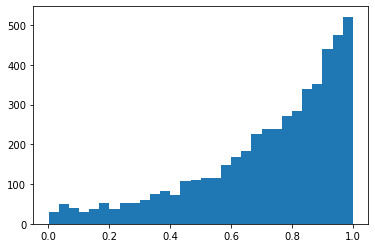

In [5]:
p_val = -np.random.exponential(scale=0.3,size=N)+1
idx0 = np.where(p_val<0)[0]
p_val[idx0] = -p_val[idx0]
idx1 = np.where(p_val>1)[0]
p_val[idx1] = 1
p_val = np.sort(p_val)
plt.hist(p_val,bins=30)

### Dataframe generation

In [7]:
DF = pd.DataFrame({'gene':genes,'log2Fold':log2F,'p-val':p_val})
DF

,gene,log2Fold,p-val
0,56003,3.029611,0.000724
1,40914,-2.109358,0.001019
2,18847,1.896094,0.002521
3,36738,-1.668072,0.002829
4,39033,-1.571249,0.003193
...,...,...,...
4995,10228,0.000091,1.000000
4996,11980,-0.000082,1.000000
4997,36241,-0.000052,1.000000
4998,64950,0.000027,1.000000


### Export dataframe

In [8]:
DF.to_csv('../data/DE_dataset.csv',sep=',')
DF.to_csv('../data/DE_dataset.tsv',sep='\t')
DF.to_excel('../data/DE_dataset.xlsx')